In [1]:

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets, metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

from imblearn.combine import *
from imblearn.over_sampling import *


## Trainset

In [2]:
df= pd.read_csv('Train_df.csv')
df = df.astype(np.float64)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.769322,-0.669915,-0.019260,0.733783,0.213807,-0.463486,-0.413353,-0.009528,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-0.022689,0.682386,-0.266282,-0.435030,-0.237935,-0.034662,1.400988,-0.009528,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.450835,-0.214675,-0.513305,-0.824635,-0.418376,-0.892310,-0.413353,-0.897540,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.266304,0.465546,0.227762,-0.824635,-0.359040,0.179750,0.493817,-0.009528,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.478688,-1.225306,0.227762,0.733783,0.320815,-0.677898,-0.413353,-0.897540,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.601285,-2.526262,2.697986,4.240223,4.495807,2.967107,0.493817,2.654509,0.0
1394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.958710,-0.825128,3.439053,2.681805,2.500453,1.037399,-1.320523,0.878484,0.0
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.102378,0.773643,0.968830,-0.435030,0.274936,0.394162,1.400988,-0.009528,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.990976,1.782411,-0.266282,-0.824635,-0.359040,2.109459,0.493817,0.878484,0.0


In [4]:
df['toxicity'].value_counts()

1.0    768
0.0    630
Name: toxicity, dtype: int64

In [4]:
x_train = df.iloc[:,:1032]
y_train = df['toxicity']

## Testset

In [5]:
test = pd.read_csv('Test_df.csv')
test = test.astype(np.float64)
test

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.031682,-0.078206,0.124693,-0.070660,0.065800,-0.124521,0.271724,1.806079,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.372504,0.310100,-0.362862,-0.288668,-0.316390,-0.396949,0.271724,-0.882223,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.197573,0.416506,0.514738,0.147348,0.548903,0.365849,-1.181759,0.013878,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.359417,0.502600,-0.362862,-0.288668,-0.322430,-0.233492,0.271724,-0.882223,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.391879,-0.475822,-0.167840,-0.179664,-0.065423,-0.342464,-0.455017,0.013878,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015372,-0.448783,0.417227,0.365357,0.327722,0.093421,0.271724,0.013878,0.0
448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.054410,-1.006187,0.417227,0.147348,0.284919,0.038936,0.271724,0.013878,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.103049,-0.068065,0.417227,0.147348,0.200175,-0.233492,0.998466,0.013878,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.749251,-0.122274,1.099804,0.910377,0.731408,-0.287978,-1.181759,0.013878,0.0


In [6]:
x_test = test.iloc[:,:1032]
y_test = test['toxicity']

In [7]:
# # train validation set 나누기


# x_train, x_val, y_train,y_val = train_test_split(x_df,y_df,train_size=0.8, random_state=42)


# print(y_train.value_counts())
# print(y_val.value_counts())

# Parameter tuning

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

parameters = {'C':[0.001,0.01,0.1,1,10,100],'max_iter':[1000,3000,5000,7000,10000]}

search = RandomizedSearchCV(LogisticRegression(),parameters,n_iter=50, cv=10, refit=True, return_train_score=True)
search.fit(X=x_train, y=y_train)
print(search.best_params_)


C:\Users\lab\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'max_iter': 1000, 'C': 0.01}


In [11]:
scores_df = pd.DataFrame(search.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.023306,0.000781,0.006301,4.583392e-04,1000,0.001,"{'max_iter': 1000, 'C': 0.001}",0.592857,0.571429,0.607143,...,0.608108,0.619237,0.619237,0.617647,0.603339,0.608108,0.597299,0.608419,0.610079,0.006752
1,0.024806,0.000872,0.006201,4.002577e-04,3000,0.001,"{'max_iter': 3000, 'C': 0.001}",0.592857,0.571429,0.607143,...,0.608108,0.619237,0.619237,0.617647,0.603339,0.608108,0.597299,0.608419,0.610079,0.006752
2,0.023306,0.001487,0.006201,4.001860e-04,5000,0.001,"{'max_iter': 5000, 'C': 0.001}",0.592857,0.571429,0.607143,...,0.608108,0.619237,0.619237,0.617647,0.603339,0.608108,0.597299,0.608419,0.610079,0.006752
3,0.027707,0.010443,0.006401,4.904274e-04,7000,0.001,"{'max_iter': 7000, 'C': 0.001}",0.592857,0.571429,0.607143,...,0.608108,0.619237,0.619237,0.617647,0.603339,0.608108,0.597299,0.608419,0.610079,0.006752
4,0.024406,0.001114,0.006301,4.583444e-04,10000,0.001,"{'max_iter': 10000, 'C': 0.001}",0.592857,0.571429,0.607143,...,0.608108,0.619237,0.619237,0.617647,0.603339,0.608108,0.597299,0.608419,0.610079,0.006752
5,0.030107,0.001446,0.006201,4.004838e-04,1000,0.01,"{'max_iter': 1000, 'C': 0.01}",0.678571,0.650000,0.707143,...,0.747218,0.749603,0.754372,0.759141,0.755167,0.755962,0.736299,0.747419,0.749644,0.006446
6,0.029107,0.000831,0.006101,3.002013e-04,3000,0.01,"{'max_iter': 3000, 'C': 0.01}",0.678571,0.650000,0.707143,...,0.747218,0.749603,0.754372,0.759141,0.755167,0.755962,0.736299,0.747419,0.749644,0.006446
7,0.027907,0.001136,0.006200,4.003058e-04,5000,0.01,"{'max_iter': 5000, 'C': 0.01}",0.678571,0.650000,0.707143,...,0.747218,0.749603,0.754372,0.759141,0.755167,0.755962,0.736299,0.747419,0.749644,0.006446
8,0.029207,0.000748,0.006301,4.583810e-04,7000,0.01,"{'max_iter': 7000, 'C': 0.01}",0.678571,0.650000,0.707143,...,0.747218,0.749603,0.754372,0.759141,0.755167,0.755962,0.736299,0.747419,0.749644,0.006446
9,0.027907,0.001300,0.006101,3.002170e-04,10000,0.01,"{'max_iter': 10000, 'C': 0.01}",0.678571,0.650000,0.707143,...,0.747218,0.749603,0.754372,0.759141,0.755167,0.755962,0.736299,0.747419,0.749644,0.006446


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=50, max_iter= 1000, C= 0.01,penalty='l2')
lr.fit(X=x_train, y=y_train)

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:,1]


pred_train = lr.predict(x_train)


train_score = accuracy_score(y_train,pred_train)



Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)

print('accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
print('ROC_score :', roc_auc_score(y_test, y_pred_proba))

F1_score = 2*(Precision*Recall)/(Precision+Recall)
print("F1 score : {0}".format(F1_score))

accuracy : 0.745575221238938
Precision : 0.6273062730627307
Recall : 0.9239130434782609
ROC_score : 0.8772306943543153
F1 score : 0.7472527472527473


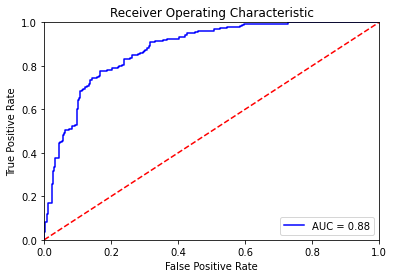

In [8]:
import matplotlib.pyplot as plt

# ROC curve
from sklearn.metrics import roc_auc_score,roc_curve,auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

roc = pd.DataFrame({
    'FPR': fpr,
    'TPRate': tpr,
    'Threshold': threshold
})

optimal_idx=np.argmax(tpr-fpr)
optimal_threshold= threshold[optimal_idx]


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

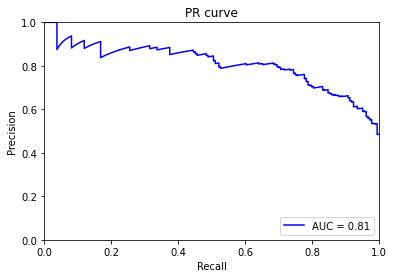

In [9]:
# precision, recall, threshold 생성
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# pr_auc 정의
pr_auc = auc(recall, precision)
# F1 score 정의
F1 = 2*(precision*recall)/(precision+recall)

plt.title('PR curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [10]:
d_t = pd.DataFrame(y_test)
d_t = d_t.reset_index(drop=True)
d_preds = pd.DataFrame(y_pred_proba)
pred_proba = pd.concat([d_t,d_preds],axis=1)
pred_proba.columns=['toxicity','prediction']
pred_proba.sort_values(by='prediction',ascending=True)

,toxicity,prediction
218,0.0,0.242750
414,0.0,0.261071
389,0.0,0.262813
371,0.0,0.272829
335,0.0,0.275658
...,...,...
48,1.0,0.774421
115,1.0,0.777014
75,1.0,0.780038
106,1.0,0.780339


In [11]:
preds_1d = y_pred_proba.flatten()
pred_class = np.where(preds_1d> optimal_threshold,1,0)

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print('idx:',optimal_idx,', threshold:',optimal_threshold )

auc_score = roc_auc_score(y_test, y_pred_proba)
accuracy_score = accuracy_score(y_test,pred_class)
Precision = precision_score(y_test,pred_class)
Recall = recall_score(y_test,pred_class)
print('ROC:',auc_score)
print('ACC:',accuracy_score)
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
F1_score = 2*(Precision*Recall)/(Precision+Recall)
print("F1 score : {0}".format(F1_score))

idx: 63 , threshold: 0.566708113669356
ROC: 0.8772306943543153
ACC: 0.8075221238938053
Precision : 0.7593582887700535
Recall : 0.7717391304347826
F1 score : 0.7654986522911051


In [13]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.6231343283582089

In [19]:
import joblib 

filename = 'LR.pkl'
joblib.dump(lr,filename)

['LR.pkl']